In [1]:
import matplotlib.pyplot as plt
import copy
import matplotlib
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec


In [2]:
matplotlib.rcParams.update({'font.size': 30})


In [3]:
def getCurveBreakdown(curves,x,y,color=False):
    curveX,curveY,curveC = [],[],[]
    if color:
        colors={'S':color,'U':color,'N':color}
    else:
        colors={'S':'k','U':'b','N':'r'}
    ltype={'S':'-','U':'-','N':'--'}
    curveT=[]
    i=0
    while i<len(curves):
        tmpX,tmpY =[],[]
        match = curves['stability'][i]
        tmpX+=[curves[x][i]]
        tmpY+=[curves[y][i]]
        curveC+=[colors[match]]
        curveT+=[ltype[match]]
        i+=1
        while i<len(curves) and curves['stability'][i]==match:
            tmpX+=[curves[x][i]]
            tmpY+=[curves[y][i]]
            i+=1
        curveX+=[tmpX]
        curveY+=[tmpY]    
    
    return curveX,curveY,curveC,curveT

In [4]:
curves = pd.read_csv("data_bif/bif_lamda3m_0.243.txt")
fixed_points = pd.read_csv("data_bif/fp_lamda3m_0.243.txt")
end_points = pd.read_csv("data_bif/LP_lamda3m_0.243.txt")

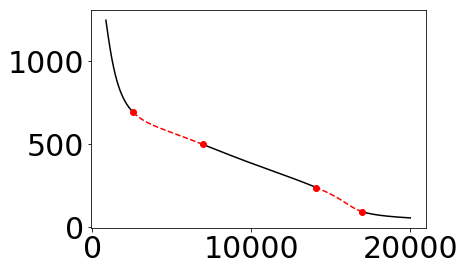

In [5]:
x,y = 'u','mz'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')


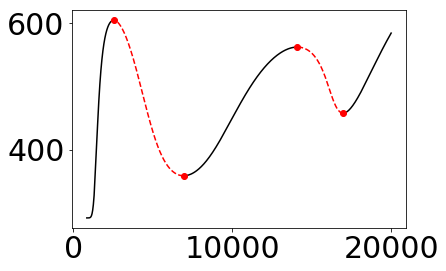

In [6]:
x,y = 'u','h'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

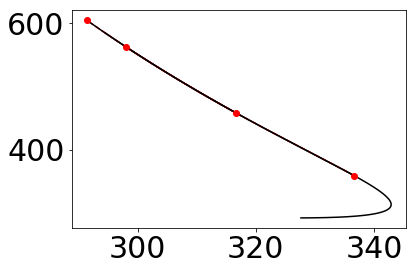

In [7]:
x,y = 'A','h'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

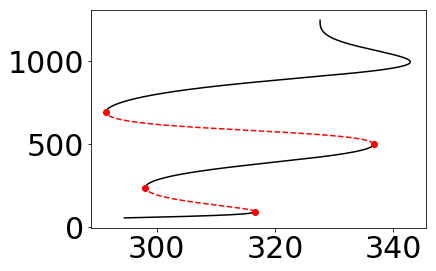

In [8]:
x,y = 'A','mz'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

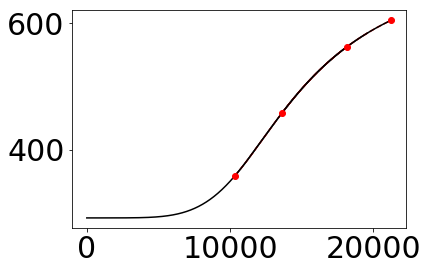

In [9]:
x,y = 'u3','h'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

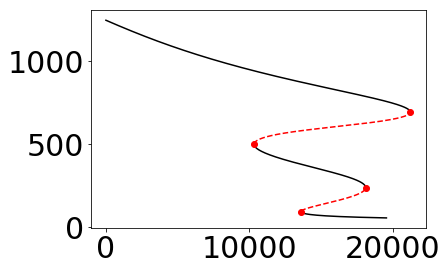

In [10]:
x,y = 'u3','mz'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

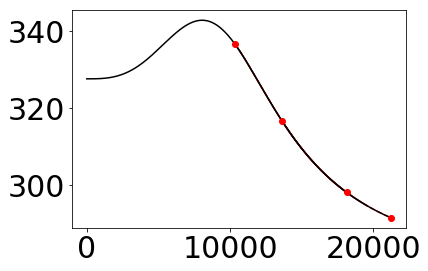

In [11]:
x,y = 'u3','A'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

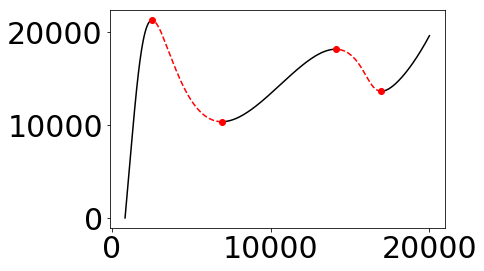

In [12]:
x,y = 'u','u3'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')

### look in depth

In [45]:
def plotCont(fileStart,fp,save=True):
    fig = plt.figure()
    gs1 = gridspec.GridSpec(3,3,width_ratios = [1,0.2,1],height_ratios=[1,0.1,1])
    gs1.update(left=0.05,right=3,top=6,bottom=0)
    ax1a = plt.subplot(gs1[0, 0])
    ax1c = plt.subplot(gs1[0, 2])
    ax1e = plt.subplot(gs1[2, 0])
    ax1f = plt.subplot(gs1[2, 2])

    colors=['k','b','r','m','y','orange']
    axisLabels={'ms':'Snail mRNA','u':'$\mu_{200}$ (molecules)','mz':'Zeb mRNA (molecules)','A':'AMPK (nM)','h':'Hif-1 (nM)','u3':'$\mu_{34}$ (molecules)'}
    legend_elements=[]
    count=0
    for fileF in os.listdir('data_bif'):
        if (fileStart in fileF) and len(fileStart.split("_"))<4:
            if True:#try:
                filefp = fileF.replace('bif','fp')
                fileep = fileF.replace('bif','LP') 
                lab = fileF.replace(".txt",'').split("_")[2]
                curves = pd.read_csv("data_bif/"+fileF)
                fixed_points = pd.read_csv("data_bif/"+filefp)
                end_points = pd.read_csv("data_bif/"+fileep)

                x,y = 'mz',fp
                curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y,colors[count])
                for i in range(len(curveC)):
                    ax1a.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i],lw=4)#,label=lab
                #plt.plot(fixed_points[x],fixed_points[y],'ko')
                ax1a.plot(end_points[x],end_points[y],'ro',markersize=10)
                ax1a.set_xlabel(axisLabels[x])
                ax1a.set_ylabel(axisLabels[y])

                x,y = 'u',fp
                curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y,colors[count])
                for i in range(len(curveC)):
                    ax1c.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i],lw=4)
                ax1c.plot(end_points[x],end_points[y],'ro',markersize=10)
                ax1c.set_xlabel(axisLabels[x])
                ax1c.set_ylabel(axisLabels[y])

                x,y = 'ms',fp
                curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y,colors[count])
                for i in range(len(curveC)):
                    ax1e.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i],lw=4)
                ax1e.plot(end_points[x],end_points[y],'ro',markersize=10)
                ax1e.set_xlabel(axisLabels[x])
                ax1e.set_ylabel(axisLabels[y])

                x,y = 'u3',fp
                curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y,colors[count])
                for i in range(len(curveC)):
                    ax1f.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i],lw=4)
                ax1f.plot(end_points[x],end_points[y],'ro',markersize=10)
                ax1f.set_xlabel(axisLabels[x])
                ax1f.set_ylabel(axisLabels[y])

                legend_elements += [Patch(facecolor=colors[count], edgecolor=colors[count],label=lab)]
                count+=1
            else:#except:
                print "err with ", fileStart
        ax1c.legend(handles=legend_elements,  bbox_to_anchor=(1.05, 1), loc='upper left')
        if save:
            fig.savefig("bif_figures/"+fileStart+".png",bbox_inches='tight')
            plt.close()
        else:
            plt.show()
            plt.close()

In [46]:
def plotContEMT(fileStart,save=True):
    fig = plt.figure()
    gs1 = gridspec.GridSpec(5,3,width_ratios = [1,0.2,1],height_ratios=[1,0.1,1,0.1,1])
    gs1.update(left=0.05,right=3,top=6,bottom=0)
    ax1a = plt.subplot(gs1[0, 0])
    ax1b = plt.subplot(gs1[0, 2])
    ax1c = plt.subplot(gs1[2, 0])
    ax1d = plt.subplot(gs1[2, 2])
    ax1e = plt.subplot(gs1[4, 0])
    ax1f = plt.subplot(gs1[4, 2])

    colors=['k','b','r','m','y','orange']
    axisLabels={'u':'$\mu_{200}$ (molecules)','mz':'Zeb mRNA (molecules)','u3':'$\mu_{34}$ (molecules)'}
    legend_elements=[]
    count=0
    for fileF in os.listdir('data_bif'):
        if (fileStart in fileF) and len(fileStart.split("_"))<4:
                filefp = fileF.replace('bif','fp')
                fileep = fileF.replace('bif','LP') 
                lab = fileF.replace(".txt",'').split("_")[2]
                curves = pd.read_csv("data_bif/"+fileF)
                fixed_points = pd.read_csv("data_bif/"+filefp)
                end_points = pd.read_csv("data_bif/"+fileep)
                
                ax1a.hist(curves['u'],bins=50)
                ax1b.hist(curves['ms'],bins=50)
                ax1c.hist(curves['S'],bins=50)
                ax1d.hist(curves['mz'],bins=50)
                ax1e.hist(curves['u3'],bins=50)
                ax1f.plot(curves['u'],curves['mz'])
                ax1f.set_xlim(0,25000)

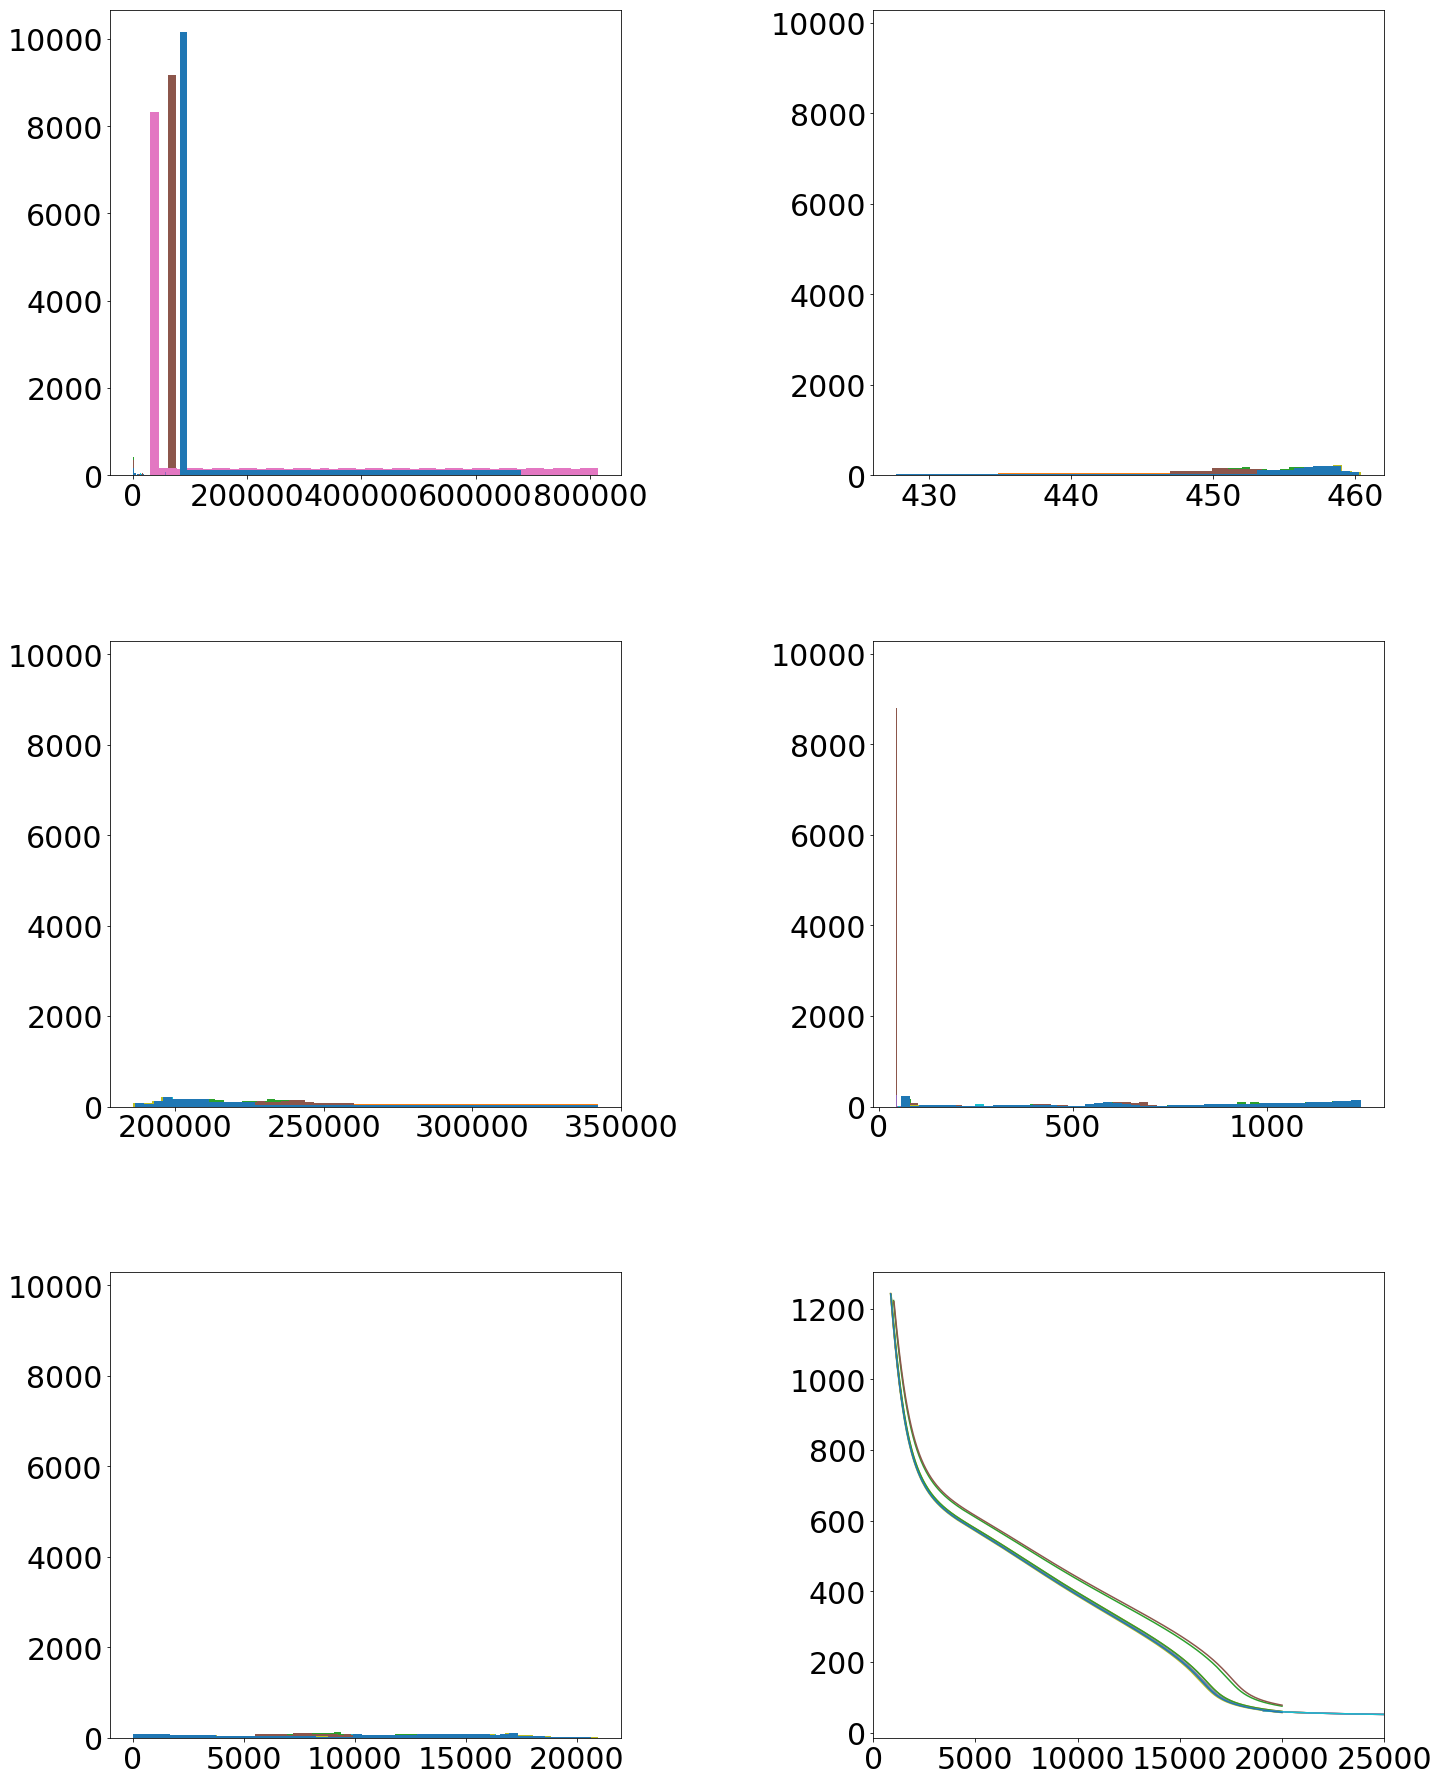

In [39]:
plotContEMT('bif_lamdaAu')

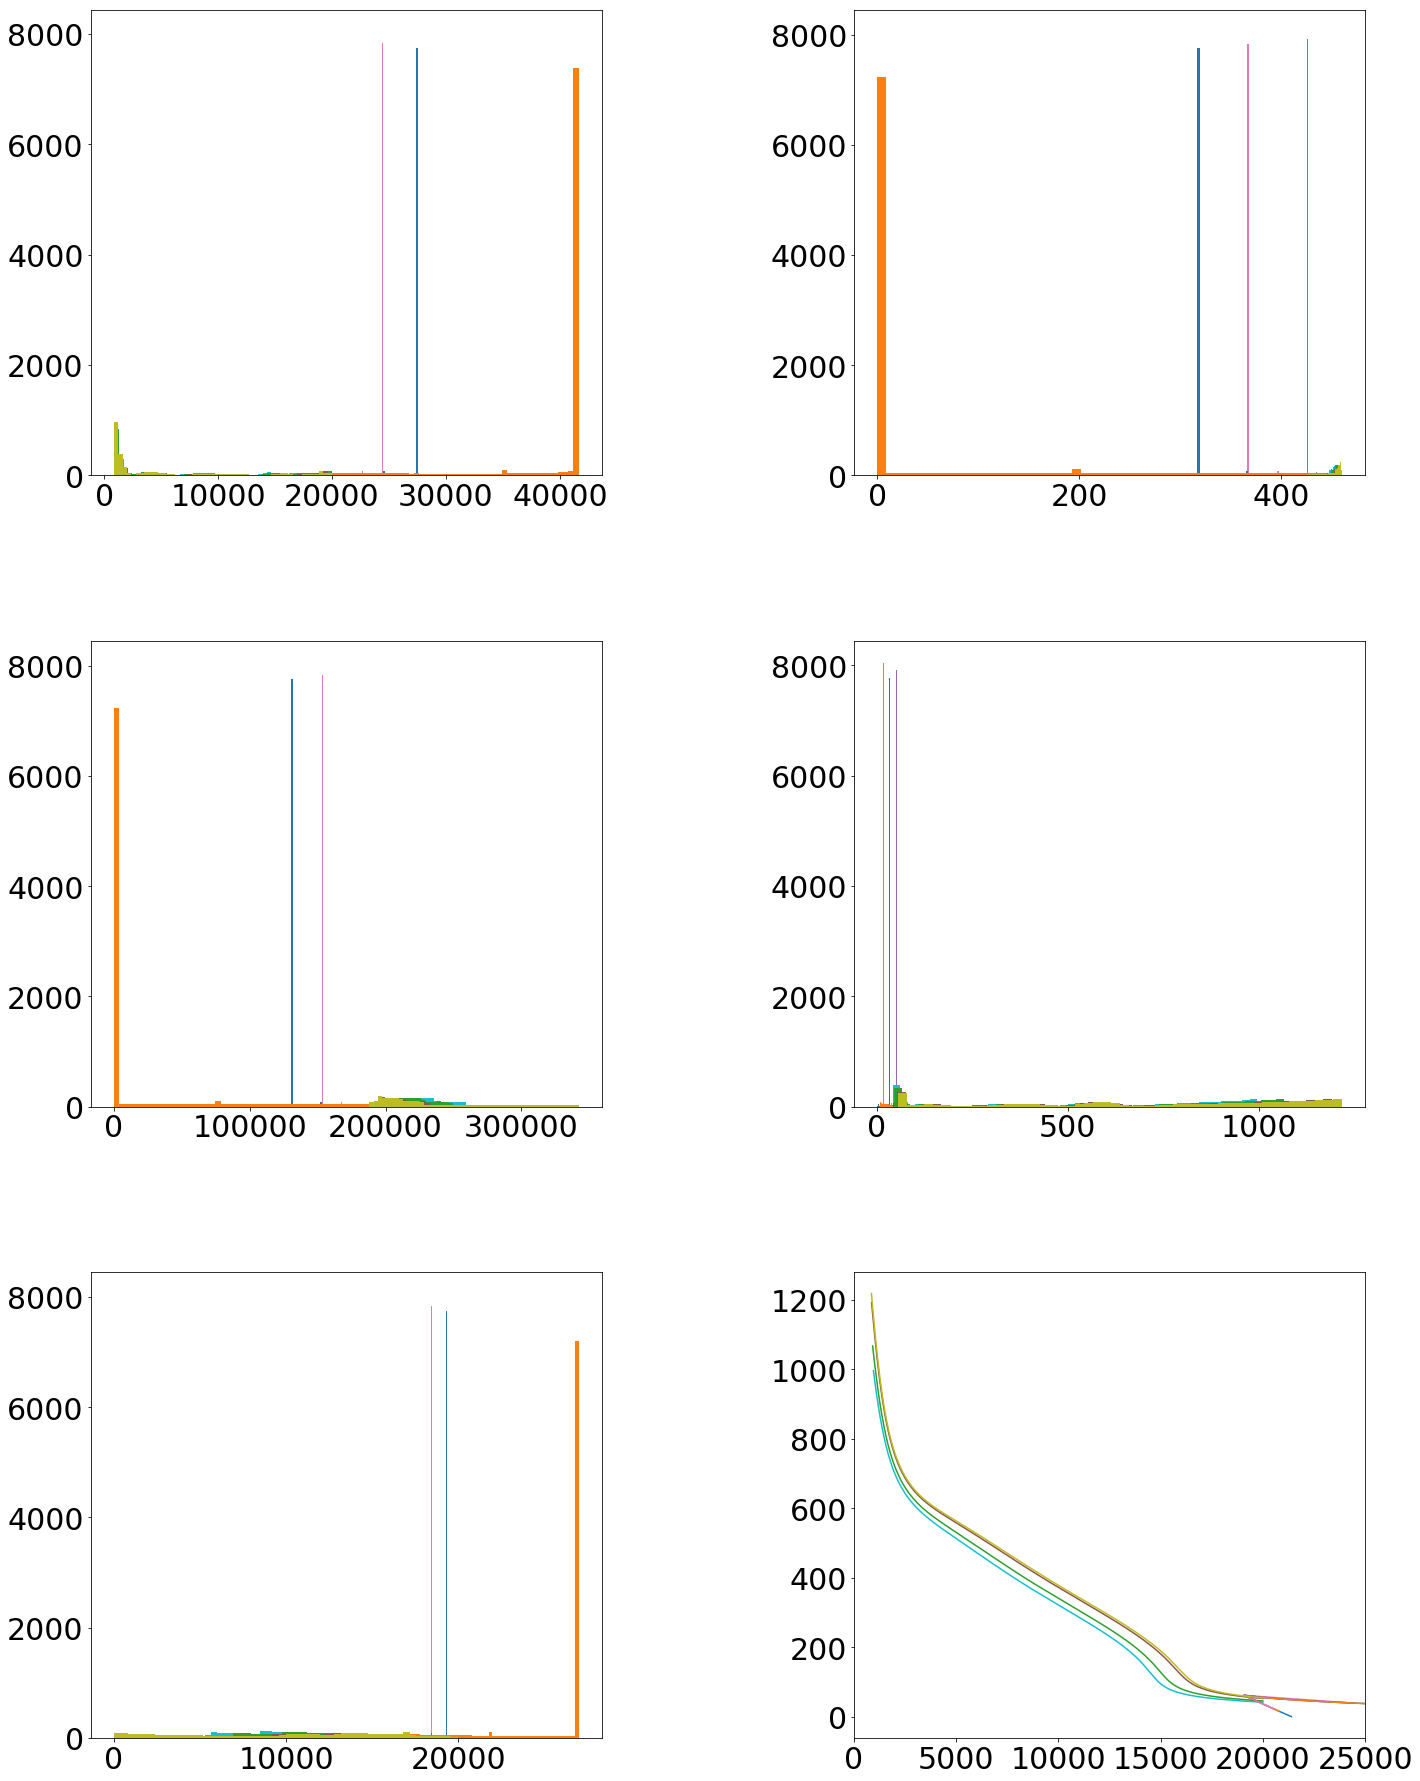

In [40]:
plotContEMT('bif_lamdaAm')

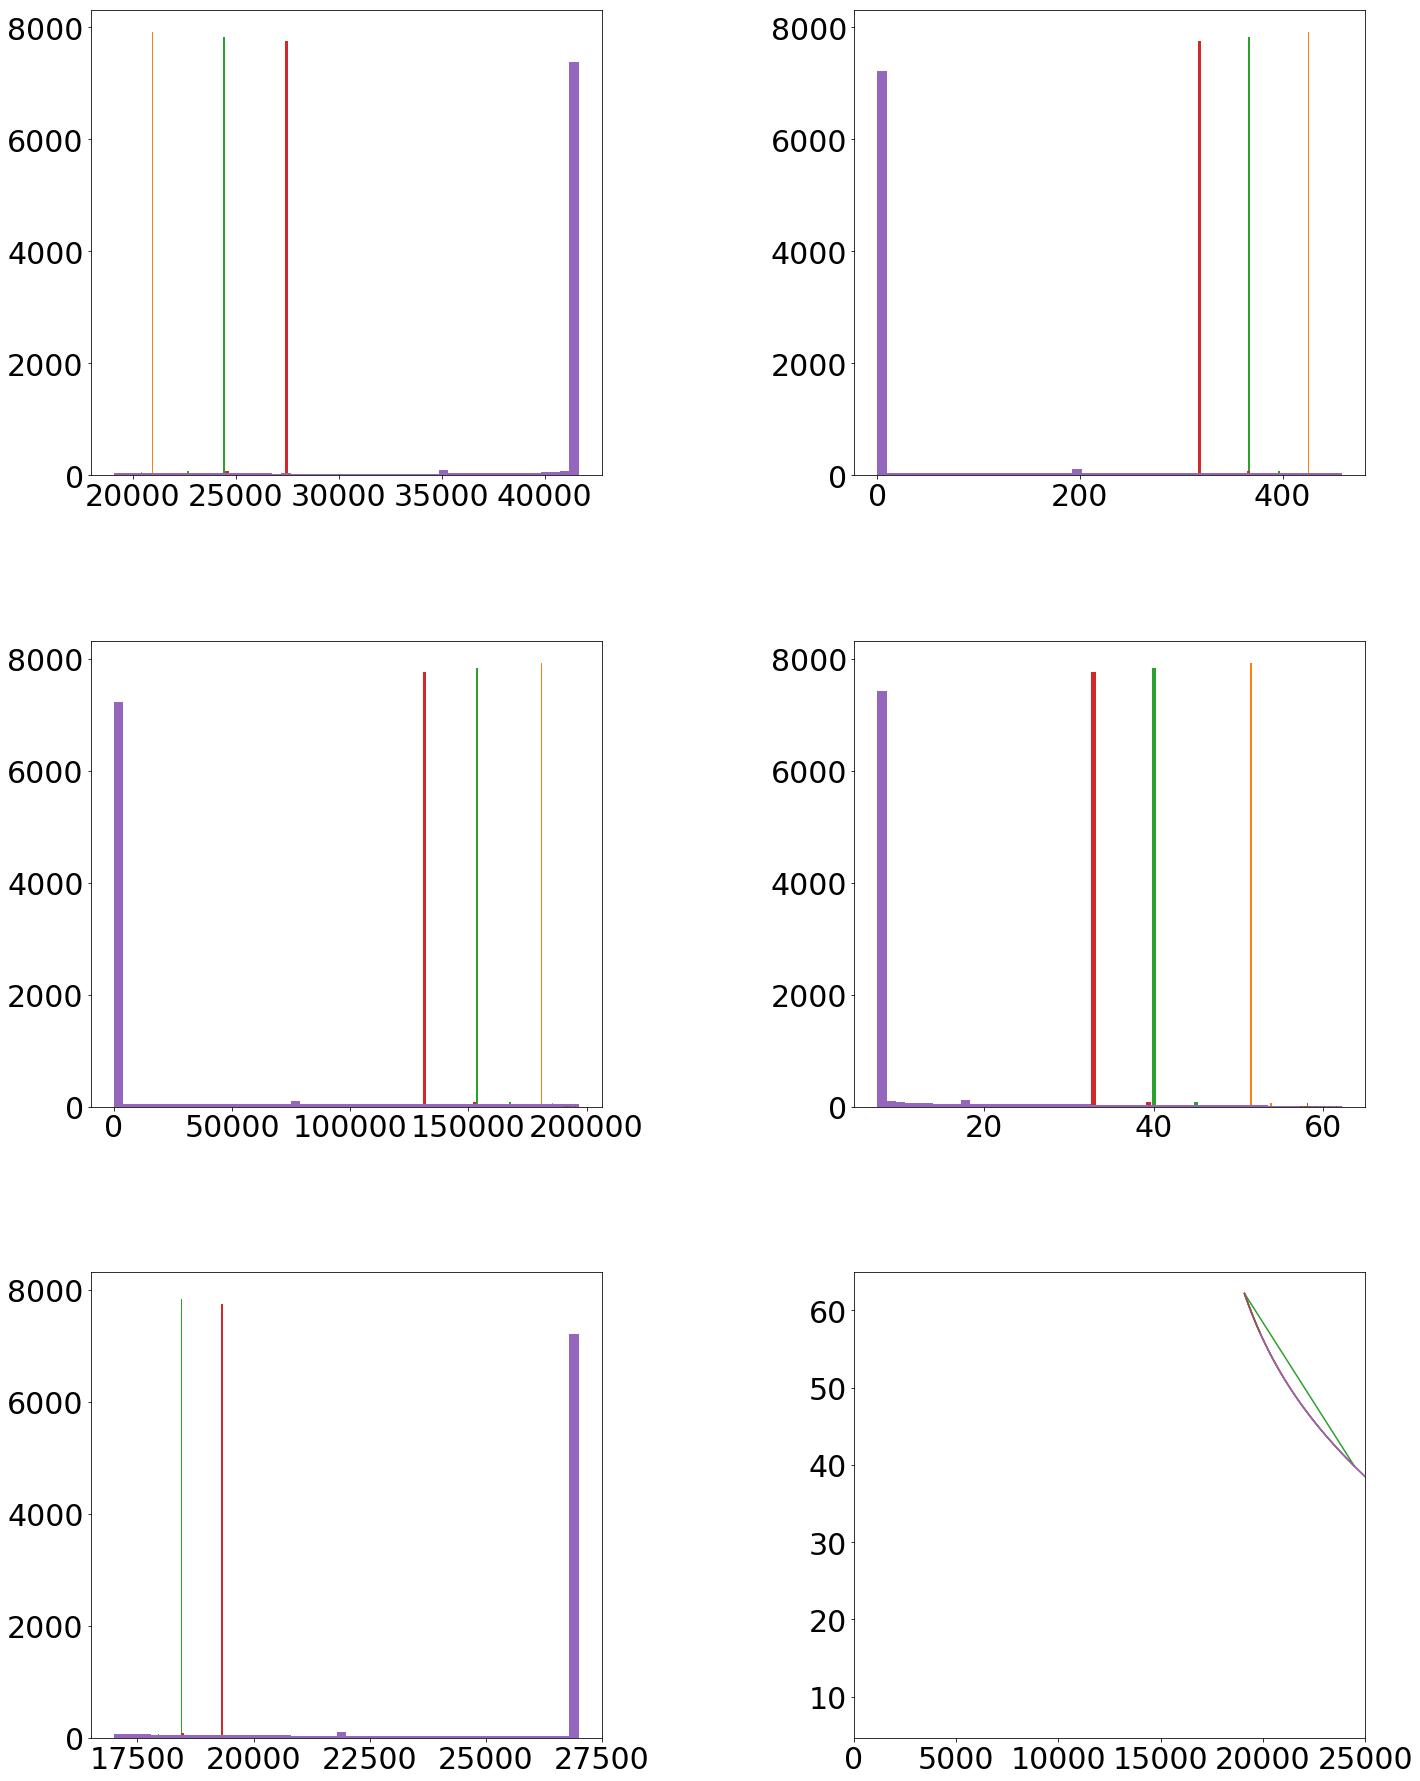

In [48]:
plotContEMT('bif_lamdaAms')

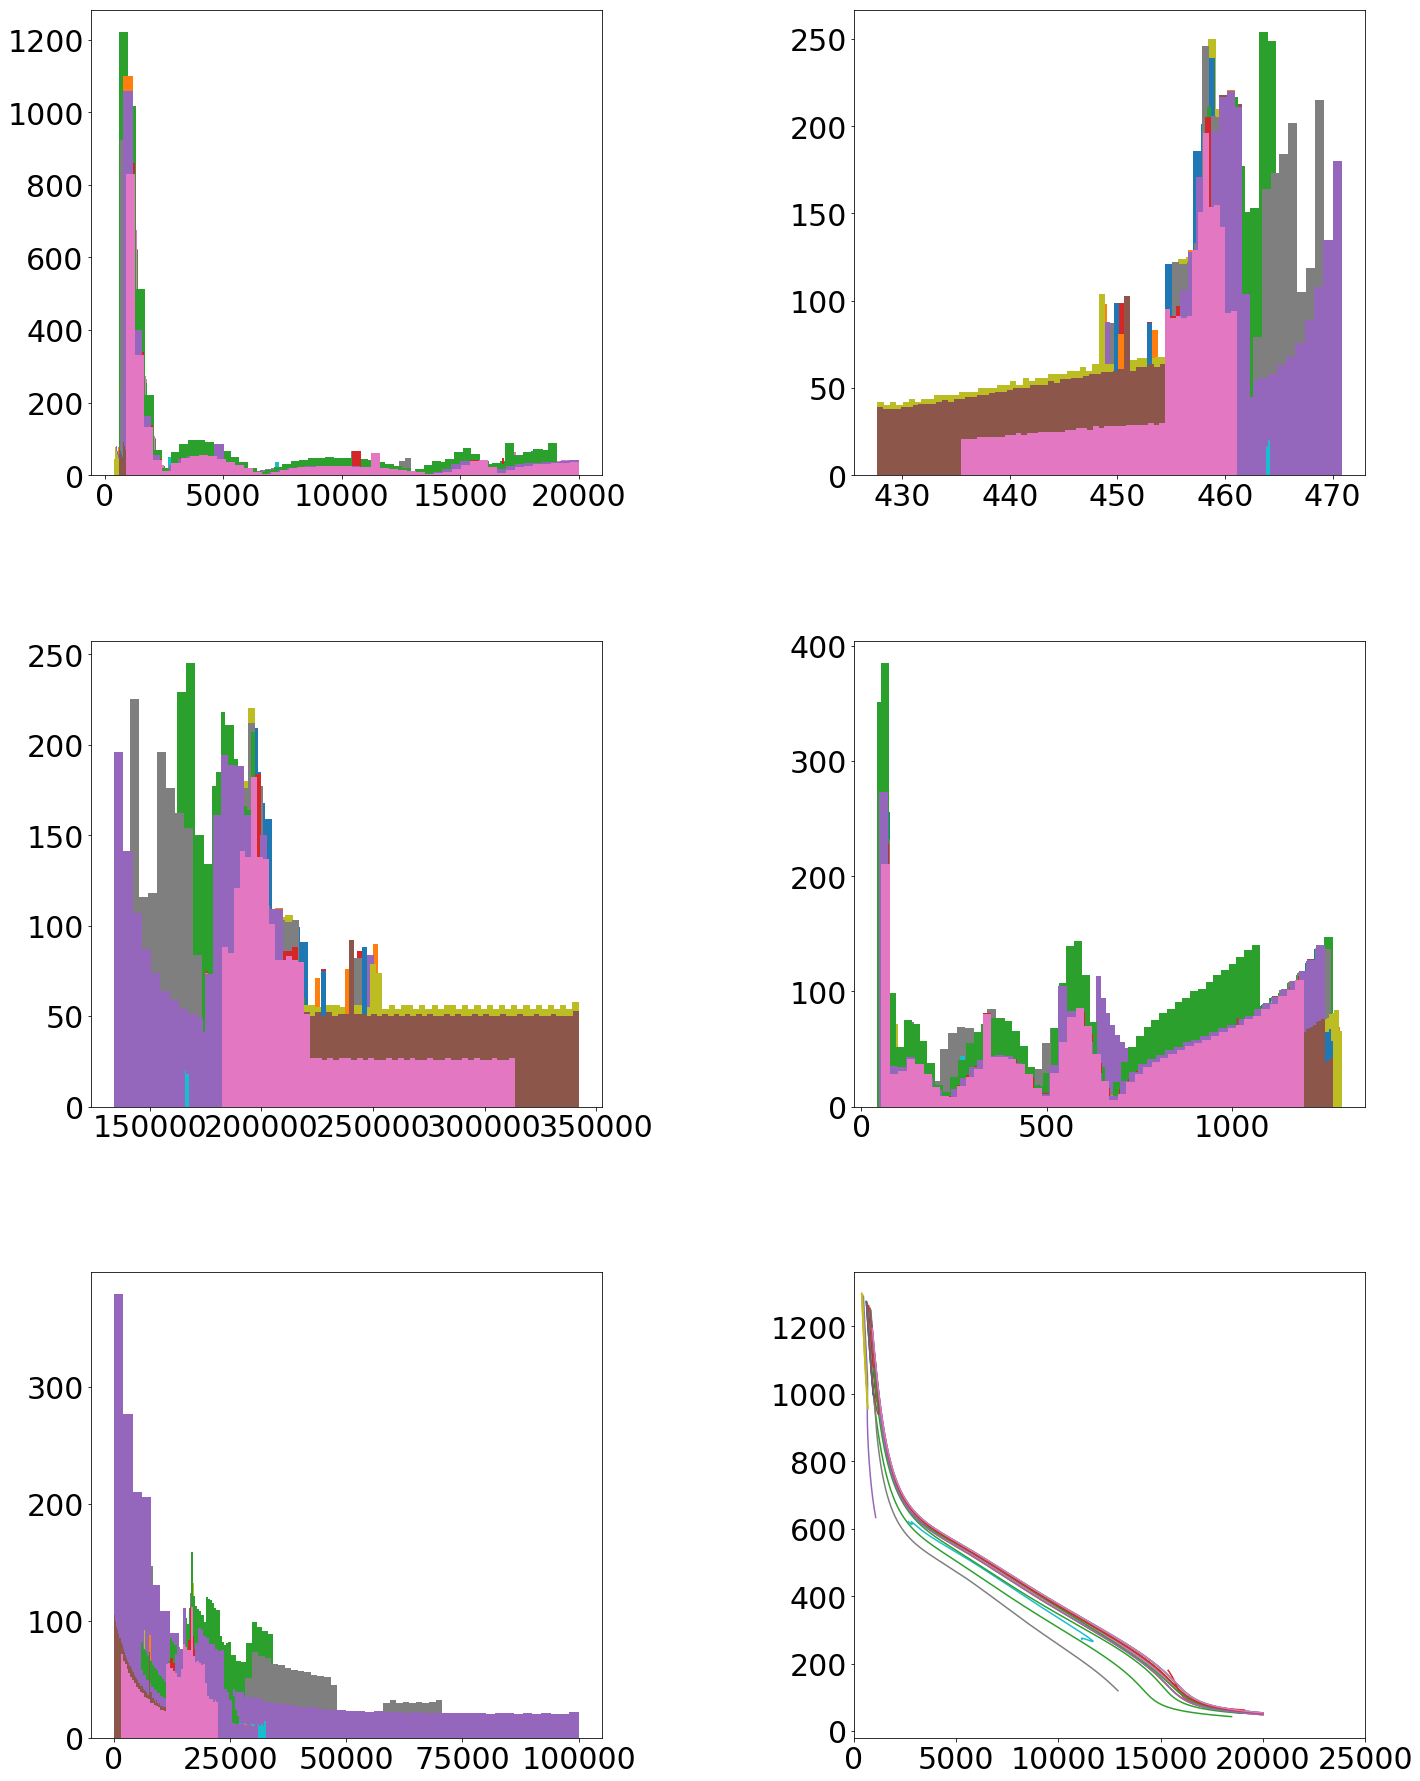

In [41]:
plotContEMT('bif_lamdahu')

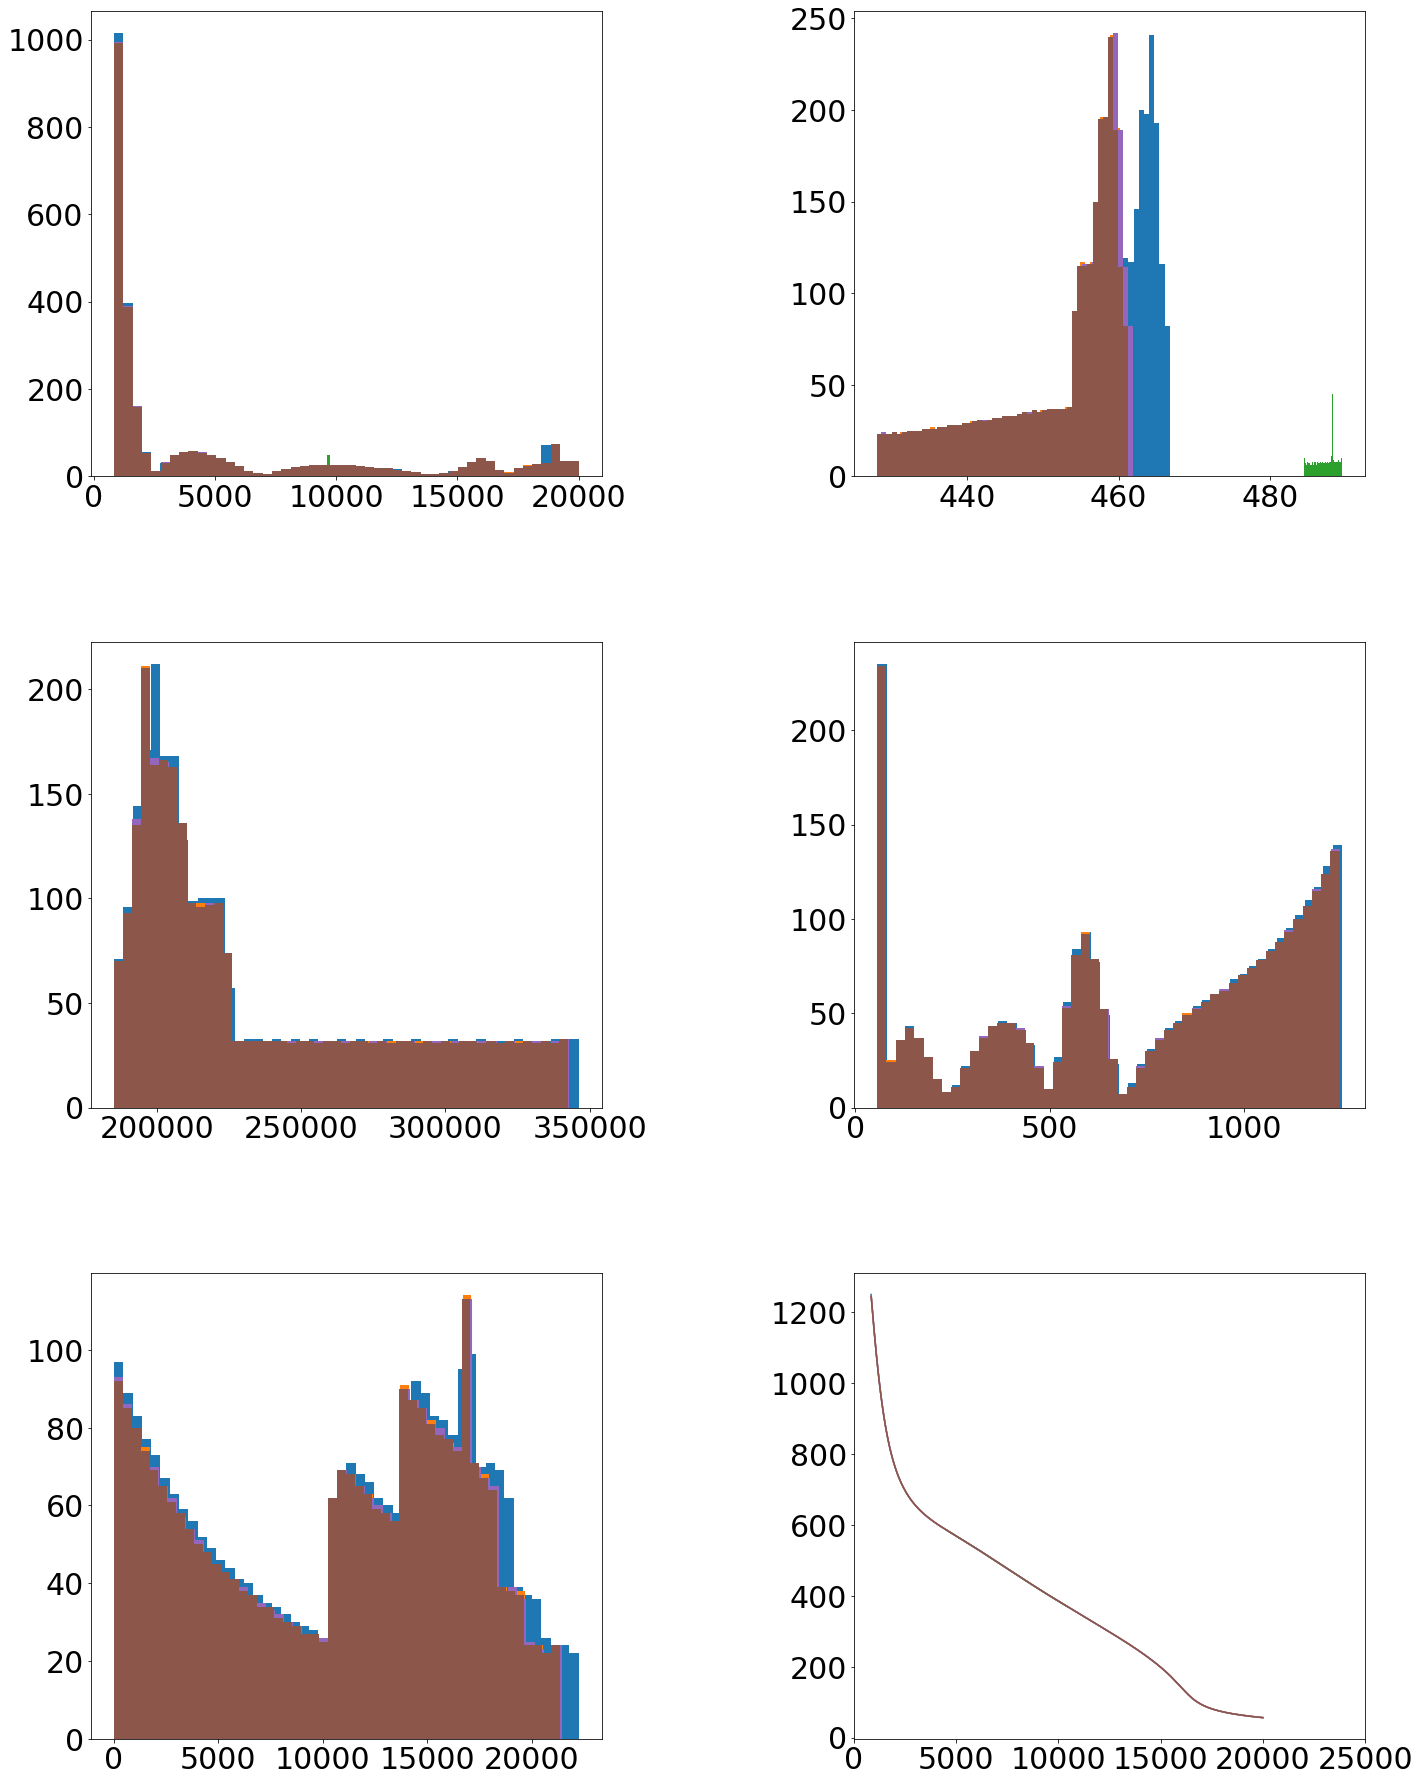

In [42]:
plotContEMT('bif_lamdahms')

In [43]:
plotCont('EMW_bif_lamdaAu','A')
plotCont('EMW_bif_lamdaAm','A')
plotCont('EMW_bif_lamdaAms','A')

KeyError: 'A'

In [47]:
plotCont('EMW_bif_lamdahms','h')
plotCont('EMW_bif_lamdahu','h')


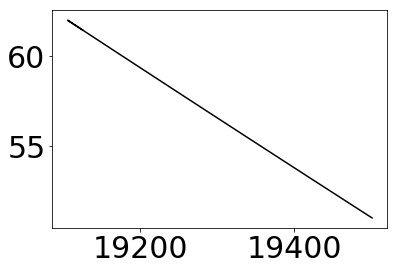

In [17]:
curves = pd.read_csv("data_bif/EMW_bif_lamdaAm_0.9.txt")
fixed_points = pd.read_csv("data_bif/EMW_fp_lamdaAm_0.9.txt")
end_points = pd.read_csv("data_bif/EMW_LP_lamdaAm_0.9.txt")

x,y = 'u','mz'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')


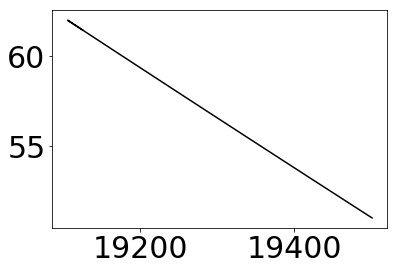

In [18]:
x,y = 'u','mz'
curveX,curveY,curveC,curveT = getCurveBreakdown(curves,x,y)

for i in range(len(curveC)):
    plt.plot(curveX[i],curveY[i],color=curveC[i],linestyle=curveT[i])
#plt.plot(fixed_points[x],fixed_points[y],'ko')
plt.plot(end_points[x],end_points[y],'ro')
